In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## 1. 데이터 로드 + 훈련데이터와 테스트 데이터로 나누기

In [9]:
cafe_reviews = pd.read_csv('C:/Users/User/Desktop/cafe_reviews.csv', encoding='cp949') 
# 긍정 리뷰 874개, 부정 리뷰 700개로 이루어진 카페 리뷰 데이터

In [10]:
from sklearn.model_selection import train_test_split 
# 훈련 데이터와 테스트 데이터를 랜덤으로 나누어 주기 위해 train_test_split import 해온다.
# 이 라이브러리를 사용하면 두 데이터에 0과 1을 골고루 섞어줄 수 있다.

In [11]:
train_data, test_data = train_test_split(cafe_reviews, random_state=42)

In [12]:
print(train_data.shape) # 훈련 데이터 1180개

(1180, 68)


In [13]:
print(test_data.shape) # 테스트 데이터 394

(394, 68)


In [14]:
train_data

,review,label,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
1108,"커피는 괜찮지만, 2층 흡연실 문이 열리고 닫힐때마다 담배연기가 실내에 퍼져 비흡연...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1490,예쁘기만해요... 맛은...가격도조금비싸요,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,널찍하고 조았다 스무디볼 존맛,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,굿,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,카공족에게는 너무 좋은 곳,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,최근 방문일,21.7.15.목,2021년 7월 15일 목요일,영수증
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,화장실 개 더러워 어떻게 사용해..?,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1294,사람이 많아 짱 많아,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
860,시험기간 공부장소 안성맞춤 개꿀,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1459,사람 쥰내많아서 앉으려면 기다려야됨,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
test_data

,review,label,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
1121,왔다가 정말 스트레스만 적립하고 감.,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
811,주차 너무 편해요~,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1172,층별로 분위기 다르고 공부하기도 좋은데 사람들이 많이 오면 와이파이가 너무 약해서 ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
534,진짜 맛있어요,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
514,"분위기도 좋고, 사장님도 친절합니다.",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,2층에 테이블간 간격이 넘좁아요,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
936,너무 시끄러워서 공부 집중이 안되네요,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1338,이걸 보는 다른 손님들이 계시다면 차라리 편의점 커피를 드시길 추천합니다.,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
692,가게도 깨끗하고 분위기 좋아요,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
train_data = train_data[["review", "label"]] # 결측치 부분 제거
train_data

,review,label
1108,"커피는 괜찮지만, 2층 흡연실 문이 열리고 닫힐때마다 담배연기가 실내에 퍼져 비흡연...",0
1490,예쁘기만해요... 맛은...가격도조금비싸요,0
365,널찍하고 조았다 스무디볼 존맛,1
265,굿,1
287,카공족에게는 너무 좋은 곳,1
...,...,...
1130,화장실 개 더러워 어떻게 사용해..?,0
1294,사람이 많아 짱 많아,0
860,시험기간 공부장소 안성맞춤 개꿀,1
1459,사람 쥰내많아서 앉으려면 기다려야됨,0


In [17]:
test_data = test_data[["review", "label"]]# 결측치 부분 제거
test_data

,review,label
1121,왔다가 정말 스트레스만 적립하고 감.,0
811,주차 너무 편해요~,1
1172,층별로 분위기 다르고 공부하기도 좋은데 사람들이 많이 오면 와이파이가 너무 약해서 ...,0
534,진짜 맛있어요,1
514,"분위기도 좋고, 사장님도 친절합니다.",1
...,...,...
1460,2층에 테이블간 간격이 넘좁아요,0
936,너무 시끄러워서 공부 집중이 안되네요,0
1338,이걸 보는 다른 손님들이 계시다면 차라리 편의점 커피를 드시길 추천합니다.,0
692,가게도 깨끗하고 분위기 좋아요,1


In [18]:
train_data[:5]

,review,label
1108,"커피는 괜찮지만, 2층 흡연실 문이 열리고 닫힐때마다 담배연기가 실내에 퍼져 비흡연...",0
1490,예쁘기만해요... 맛은...가격도조금비싸요,0
365,널찍하고 조았다 스무디볼 존맛,1
265,굿,1
287,카공족에게는 너무 좋은 곳,1


In [19]:
test_data[:5]

,review,label
1121,왔다가 정말 스트레스만 적립하고 감.,0
811,주차 너무 편해요~,1
1172,층별로 분위기 다르고 공부하기도 좋은데 사람들이 많이 오면 와이파이가 너무 약해서 ...,0
534,진짜 맛있어요,1
514,"분위기도 좋고, 사장님도 친절합니다.",1


## 2. 데이터 정제하기

In [20]:
train_data['review'].nunique() # 데이터 중복 유무를 확인

1042

In [21]:
train_data.drop_duplicates(subset=['review'], inplace=True) # 중복 샘플 제거

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9720\3134215963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop_duplicates(subset=['review'], inplace=True)


In [22]:
len(train_data) # 중복 샘플 제거 확인

1042

<AxesSubplot:>

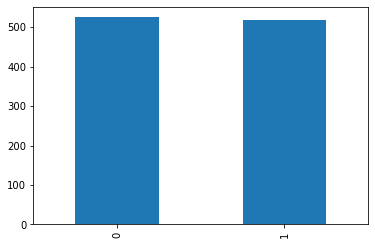

In [23]:
train_data['label'].value_counts().plot(kind = 'bar')

In [24]:
print(train_data.groupby('label').size().reset_index(name = 'count')) # 0과 1이 골고루 있다.

   label  count
0      0    525
1      1    517


In [25]:
print(train_data.isnull().values.any()) # 리뷰 중에 Null이 있는가?

False


In [26]:
# 한글과 공백을 제외하고 모두 제거한다.
train_data['review'] = train_data['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:5]

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9720\2352140794.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['review'] = train_data['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9720\2352140794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['review'] = train_data['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,review,label
1108,커피는 괜찮지만 층 흡연실 문이 열리고 닫힐때마다 담배연기가 실내에 퍼져 비흡연자에...,0
1490,예쁘기만해요 맛은가격도조금비싸요,0
365,널찍하고 조았다 스무디볼 존맛,1
265,굿,1
287,카공족에게는 너무 좋은 곳,1


In [27]:
train_data['review'] = train_data['review'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
train_data['review'].replace('', np.nan, inplace=True)
# 기존에 한글이 없는 리뷰였다면 더 이상 아무런 값도 없는 빈(empty) 값이 되었을 것
print(train_data.isnull().sum())
# Null 값이 5개 생김

review    5
label     0
dtype: int64


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9720\3946236247.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['review'] = train_data['review'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9720\3946236247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['review'] = train_data['review'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9720\3946236247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [28]:
train_data.loc[train_data.review.isnull()][:5]

,review,label
27,NaN,1
92,NaN,1
313,NaN,1
186,NaN,1
161,NaN,1


In [29]:
train_data = train_data.dropna(how = 'any') # Null 값 5개 없애준다.
print(len(train_data))

1037


In [30]:
# 테스트 데이터에서도 똑같이 전처리 과정 수행

test_data.drop_duplicates(subset = ['review'], inplace=True) # review 열에서 중복인 내용이 있다면 중복 제거
test_data['review'] = test_data['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['review'] = test_data['review'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test_data['review'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 352


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9720\500653556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop_duplicates(subset = ['review'], inplace=True) # revie 열에서 중복인 내용이 있다면 중복 제거
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9720\500653556.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['review'] = test_data['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9720\500653556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

## 3. 토큰화

In [31]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', 'ㅠ', 'ㅠㅠ', 'ㅜㅜ', 'ㅋㅋ', 'ㅡㅡ', 'ㅠㅜ', 'ㄱ', 'ㄷㄷㄷ', 'ㅠㅠㅠㅠㅠㅠ']

In [32]:
X_train = []
for sentence in tqdm(train_data['review']):
    okt = Okt() # 형태소 분석기
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

100%|██████████| 1037/1037 [00:07<00:00, 135.54it/s]


In [33]:
print(X_train[:3])

[['커피', '괜찮다', '층', '흡연실', '문', '열리다', '닫히다', '때', '마다', '담배', '연기', '실내', '퍼지다', '비', '흡연', '에게는', '비추다'], ['예쁘다', '해', '요', '맛', '가격', '조금', '비싸다'], ['널찍하다', '좋다', '스무디', '볼', '존맛']]


In [34]:
# 테스트 데이터에서도 동일하게 토큰화

X_test = []
for sentence in tqdm(test_data['review']):
    okt = Okt() # 형태소 분석기
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_test.append(stopwords_removed_sentence)

100%|██████████| 352/352 [00:00<00:00, 763.61it/s]


In [35]:
print(X_test[:3])

[['오다', '정말', '스트레스', '만', '적립', '하고', '감'], ['주차', '너무', '편하다'], ['층', '별로', '분위기', '다르다', '공부', '좋다', '사람', '많이', '오다', '와이파이', '너무', '약하다', '못', '버티다', '와이파이', '때문', '그', '옆', '스타벅스', '감']]


## 4. 정수 인코딩

In [36]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train) # 훈련 데이터에 대한 단어 집합 형성

In [37]:
print(tokenizer.word_index)

{'좋다': 1, '너무': 2, '커피': 3, '없다': 4, '많다': 5, '있다': 6, '맛있다': 7, '공부': 8, '맛': 9, '분위기': 10, '카페': 11, '직원': 12, '않다': 13, '친절하다': 14, '조용하다': 15, '층': 16, '가격': 17, '사람': 18, '넓다': 19, '곳': 20, '음료': 21, '매장': 22, '같다': 23, '을': 24, '이다': 25, '별로': 26, '요': 27, '안': 28, '자리': 29, '분': 30, '가다': 31, '되다': 32, '보다': 33, '비싸다': 34, '편하다': 35, '오다': 36, '시끄럽다': 37, '아니다': 38, '화장실': 39, '빵': 40, '먹다': 41, '다': 42, '에서': 43, '생각': 44, '공간': 45, '좌석': 46, '로': 47, '불편하다': 48, '것': 49, '나오다': 50, '사장': 51, '자다': 52, '주차': 53, '님': 54, '때': 55, '깔끔하다': 56, '그냥': 57, '깨끗하다': 58, '적': 59, '하고': 60, '받다': 61, '정말': 62, '고': 63, '의자': 64, '그렇다': 65, '나': 66, '불친절하다': 67, '만': 68, '손님': 69, '예쁘다': 70, '주문': 71, '많이': 72, '쾌적하다': 73, '넘다': 74, '들다': 75, '테이블': 76, '비': 77, '종류': 78, '일': 79, '장소': 80, '모르다': 81, '알바생': 82, '못': 83, '시간': 84, '앉다': 85, '느낌': 86, '여기': 87, '듯': 88, '인테리어': 89, '인': 90, '콘센트': 91, '보이다': 92, '서비스': 93, '크다': 94, '수': 95, '스터디': 96, '분들': 97, '괜찮다': 98, '아쉽다': 99, '다른'

In [38]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 1946
등장 빈도가 2번 이하인 희귀 단어의 수: 1362
단어 집합에서 희귀 단어의 비율: 69.98972250770812
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 19.22323383657946


## => 희귀 단어 등장 빈도 비율이 20% 가까이 되므로 등장 빈도수가 2 이하인 단어들을 제거하지 않는다.

In [39]:
vocab_size = total_cnt # 단어 집합 크기 (제거된게 없으므로 그대로 유지)
# 정수 인코딩 진행
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [40]:
print(X_train[:3]) # 정수 인코딩 되었는지 확인

[[3, 98, 16, 585, 247, 292, 586, 55, 152, 891, 892, 189, 893, 77, 426, 354, 172], [70, 587, 27, 9, 17, 129, 34], [588, 1, 589, 427, 428]]


In [41]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

## 5. 빈 샘플 제거

In [42]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [43]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

1036
1036


C:\Users\user\anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


## 6. 패딩

리뷰의 최대 길이 : 120
리뷰의 평균 길이 : 8.374517374517374


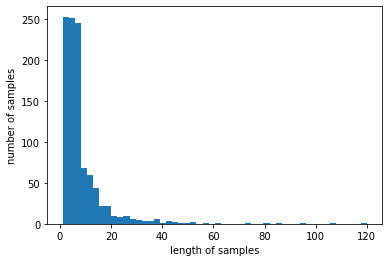

In [44]:
# 서로 다른 길이의 샘플들의 길이를 동일하게 맞춰주는 것이 패딩 작업

print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [45]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [46]:
max_len = 40
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 40 이하인 샘플의 비율: 98.26254826254826


In [47]:
# 모든 샘플의 길이를 40으로 통일

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

### 7. LSTM으로 카페 리뷰 감성 분류하기

In [48]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
# Embedding: 벡터 공간에서 더 가까운 단어가 예상되도록 단어의 의미를 인코딩하는 실수 값 벡터의 형태로 텍스트 분석을 위한 단어 표현에 사용되는 용어
# Dense: 뉴런의 입력과 출력을 연결
# LSTM: RNN의 한 종류. 단순한 neural network layer 한 층 대신, 4개의 layer가  특별한 방식으로 서로 정보를 주고 받도록 되어 있다.
# LSTM -> 기울기 소멸 문제 방지

from tensorflow.keras.models import Sequential # 순차적으로 레이어 층 더해줌
from tensorflow.keras.models import load_model # 모델 불러오기 함수
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# EarlyStopping: 과적합을 방지하기 위해 조기종료
# ModelCheckpoint: 학습 중인 모델 자동으로 저장하기

embedding_dim = 100 # 임베딩 벡터 차원은 100
hidden_units = 128 # 은닉 상태의 크기는 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid')) # 활성화 함수로 시그모이드 함수 사용. 로지스틱 회귀를 사용해야 하므로
# 로지스틱 회귀분석에서는 종속변수가 0 또는 1이기 때문에  y=wx+b 을 이용해서 예측하는 것은 의미가 없다

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4) # 조기종료
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True) # 자동 저장

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) # 손실함수: binary_crossentropy. 이진 분류에 적합
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2) # 검증데이터는 20% 사용

Epoch 1/15
13/13 [==============================] - ETA: 0s - loss: 0.6746 - acc: 0.6353
Epoch 1: val_acc improved from -inf to 0.73077, saving model to best_model.h5
13/13 [==============================] - 4s 93ms/step - loss: 0.6746 - acc: 0.6353 - val_loss: 0.6330 - val_acc: 0.7308
Epoch 2/15
13/13 [==============================] - ETA: 0s - loss: 0.5474 - acc: 0.8056
Epoch 2: val_acc improved from 0.73077 to 0.81250, saving model to best_model.h5
13/13 [==============================] - 1s 41ms/step - loss: 0.5474 - acc: 0.8056 - val_loss: 0.4726 - val_acc: 0.8125
Epoch 3/15
13/13 [==============================] - ETA: 0s - loss: 0.3493 - acc: 0.8865
Epoch 3: val_acc improved from 0.81250 to 0.86058, saving model to best_model.h5
13/13 [==============================] - 1s 55ms/step - loss: 0.3493 - acc: 0.8865 - val_loss: 0.3872 - val_acc: 0.8606
Epoch 4/15
13/13 [==============================] - ETA: 0s - loss: 0.2355 - acc: 0.9324
Epoch 4: val_acc improved from 0.86058 to 0.

In [49]:
loaded_model = load_model('best_model.h5') # 훈련 과정에서 검증 데이터의 정확도가 가장 높았을 때 저장된 모델인 'best_model.h5'를 로드
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1])) # 테스트 데이터에 대해서 정확도를 측정

11/11 [==============================] - 0s 7ms/step - loss: 0.3243 - acc: 0.8693

 테스트 정확도: 0.8693


## 8. 리뷰 예측해보기

In [50]:
# 임의의 리뷰에 대해서 예측하는 함수를 만들어보자

def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [51]:
sentiment_predict('맛있어요!')

1/1 [==============================] - 0s 353ms/step
98.78% 확률로 긍정 리뷰입니다.



In [52]:
sentiment_predict('공부하기 좋아요')

1/1 [==============================] - 0s 15ms/step
99.71% 확률로 긍정 리뷰입니다.



In [53]:
sentiment_predict('불친절해요')

1/1 [==============================] - 0s 13ms/step
92.00% 확률로 부정 리뷰입니다.



In [54]:
sentiment_predict("가성비가 좋아요")

1/1 [==============================] - 0s 16ms/step
97.97% 확률로 긍정 리뷰입니다.



In [55]:
sentiment_predict('화장실이 청소가 잘 안되어있다')

1/1 [==============================] - 0s 14ms/step
99.86% 확률로 부정 리뷰입니다.



In [56]:
sentiment_predict('음료가 상큼하게 역겨워요... 뭔가 이상한 걸 넣었거나 뭔가 잘못 넣은듯 3모금 겨우 먹고 버렸어요..')

1/1 [==============================] - 0s 15ms/step
99.85% 확률로 부정 리뷰입니다.



In [57]:
sentiment_predict('너무 시끄러워요')

1/1 [==============================] - 0s 14ms/step
96.32% 확률로 부정 리뷰입니다.



In [58]:
sentiment_predict('벌레나오고 알바 싸가지 없음')

1/1 [==============================] - 0s 18ms/step
99.99% 확률로 부정 리뷰입니다.



## 9. TfidfVectorizer와 Cosine_similarity를 활용한 카페 추천

In [74]:
Deus_reviews = pd.read_csv('C:/Users/User/Desktop/Deus_review.csv', encoding='cp949')

In [75]:
Deus_reviews # 데우스 카페 리뷰들

,LABEL-10
0,지난 번에는 소금빵과 포카치아에 얼그레이 밀크티 (\n..?) 마셨고 이번에는 빵 ...
1,여기 까눌레랑 소금빵 ?? 맛집이네요-! ㅎㅎ 커피도 \n맛있고 구냥 지나가다가 우...
2,"카페 매장도 넓고, 베이커리류 디저트류가 많아서 좋았어요! 음료도 맛있고 사진찍기도..."
3,보통 카페 다시 방문 잘 안하는데 여기는 주기적으로\n꼭 가요 맨처음 오픈한 직후에...
4,데우스페너 여느 아인슈페너와 비슷함 딱히 쫀쫀함\n은 없고 달달함 분위기는 힙하고 ...
...,...
61,바이크 타는 사람들은 무조건 가야 하는 곳
62,카페가 너무 예쁘고 좋아요
63,직원분들 밝게 인사해주시고 커피랑 당근케잌 너무 맛있어요 !
64,너무 맛있어요!!


In [79]:
Deus_reviews['LABEL-10'] = Deus_reviews['LABEL-10'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 힌글, 공백 제외하고 모두 제거
Deus_reviews

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5240\58638805.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Deus_reviews['LABEL-10'] = Deus_reviews['LABEL-10'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,LABEL-10
0,지난 번에는 소금빵과 포카치아에 얼그레이 밀크티 마셨고 이번에는 빵 오 쇼콜라에 ...
1,여기 까눌레랑 소금빵 맛집이네요 ㅎㅎ 커피도 맛있고 구냥 지나가다가 우연히 들어간...
2,카페 매장도 넓고 베이커리류 디저트류가 많아서 좋았어요 음료도 맛있고 사진찍기도 정...
3,보통 카페 다시 방문 잘 안하는데 여기는 주기적으로꼭 가요 맨처음 오픈한 직후에는 ...
4,데우스페너 여느 아인슈페너와 비슷함 딱히 쫀쫀함은 없고 달달함 분위기는 힙하고 깔 끔
...,...
61,바이크 타는 사람들은 무조건 가야 하는 곳
62,카페가 너무 예쁘고 좋아요
63,직원분들 밝게 인사해주시고 커피랑 당근케잌 너무 맛있어요
64,너무 맛있어요


In [59]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  print("{:.2f}% \n".format(score*100)) # 앞에서와는 다르게 출력을 퍼센트로만 나타낸다.

In [163]:
for i in range(len(Deus_reviews)):
    sentiment_predict(str(Deus_reviews.iloc[i]))
    print(i) # 각 인덱스 번호
    print("---------------------------------------------------------")
    


1/1 [==============================] - 0s 14ms/step
94.68% 

0
---------------------------------------------------------
1/1 [==============================] - 0s 15ms/step
87.25% 

1
---------------------------------------------------------
1/1 [==============================] - 0s 13ms/step
97.92% 

2
---------------------------------------------------------
1/1 [==============================] - 0s 14ms/step
4.16% 

3
---------------------------------------------------------
1/1 [==============================] - 0s 14ms/step
7.60% 

4
---------------------------------------------------------
1/1 [==============================] - 0s 15ms/step
77.36% 

5
---------------------------------------------------------
1/1 [==============================] - 0s 14ms/step
88.89% 

6
---------------------------------------------------------
1/1 [==============================] - 0s 17ms/step
98.46% 

7
---------------------------------------------------------
1/1 [=============================

### 긍정적 리뷰인 확률이 높은 것 5개

1. 99.4%  (인덱스 36번)
2. 99.33% (인덱스 47번)
3. 99.29% (인덱스 27번)
4. 99.24% (인덱스 53번)
5. 99.18% (인덱스 35번)

**각 인덱스에 해당하는 리뷰들을 추출하여 합해준 것이 overview** 

### 즉, overview는 다음과 같이 된다.

##  분위기도 좋고 커피, 케이크도 맛있어요 또 오고 싶어용 디저트 맛있어요 커피는 아쉬워요 인테리어가 멋지고 음악이 넘 좋답니다 진짜 맛있어요. 인테리어 커피 다좋아요 근데 빵도 맛있어요.. 숨겨진 빵맛집 ㅠ 커피는 좀 산미가 강해요 빵도 다 맛있어요 소금빵 있어서 넘 조아요 멋스러운 분위기와 항상 방문할 때 마다 맛있고, 직원분들은 정말 친절하십니다.




### 다른 카페들에 대해서도 똑같이 진행하여 overview를 작성해준다. 

In [5]:
Bomonde_reviews = pd.read_csv('C:/Users/User/Desktop/Bomonde_review.csv', encoding='cp949')

In [6]:
Bomonde_reviews



,LABEL-18
0,사진 찍는 스팟이 많아서 아기 데리고 가기도 좋아요\n:) 인테리어도 깔끔해요:) ...
1,9월초에 생겨서 한달도 안된 기장 신상 대형카페!! \n이미 핫플인지 사람이 엄청...
2,여기가 카페인가 관광지인가ㅎㅎ 규모가 엄청크고 \n인테리어도 너무 옙뻐서 정말 어디...
3,진짜 오랜만에 사진 100장가까이 찍은 카페 보몽드. \n조경과 건물이 넘 아름답고...
4,이렇게 넓고 유럽성같은 커피숍은 처음이에요! 주차\n장에 차대고 올라오는 풍경이 그...
...,...
104,뷰 맛집~~
105,넓고 좋네요
106,좋아요
107,엄청나네요


In [7]:
Bomonde_reviews['LABEL-18'] = Bomonde_reviews['LABEL-18'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
Bomonde_reviews

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9720\722685061.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Bomonde_reviews['LABEL-18'] = Bomonde_reviews['LABEL-18'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,LABEL-18
0,사진 찍는 스팟이 많아서 아기 데리고 가기도 좋아요 인테리어도 깔끔해요 조경도 잘...
1,월초에 생겨서 한달도 안된 기장 신상 대형카페 이미 핫플인지 사람이 엄청 많았지만...
2,여기가 카페인가 관광지인가ㅎㅎ 규모가 엄청크고 인테리어도 너무 옙뻐서 정말 어디에 ...
3,진짜 오랜만에 사진 장가까이 찍은 카페 보몽드 조경과 건물이 넘 아름답고 요즘 날씨...
4,이렇게 넓고 유럽성같은 커피숍은 처음이에요 주차장에 차대고 올라오는 풍경이 그림같고...
...,...
104,뷰 맛집
105,넓고 좋네요
106,좋아요
107,엄청나네요


In [60]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  print("{:.2f}% \n".format(score*100))

1/1 [==============================] - 0s 14ms/step
99.43% 

0
---------------------------------------------------------
1/1 [==============================] - 0s 15ms/step
1.23% 

1
---------------------------------------------------------
1/1 [==============================] - 0s 13ms/step
48.12% 

2
---------------------------------------------------------
1/1 [==============================] - 0s 13ms/step
7.95% 

3
---------------------------------------------------------
1/1 [==============================] - 0s 13ms/step
10.72% 

4
---------------------------------------------------------
1/1 [==============================] - 0s 16ms/step
79.14% 

5
---------------------------------------------------------
1/1 [==============================] - 0s 16ms/step
97.98% 

6
---------------------------------------------------------
1/1 [==============================] - 0s 14ms/step
97.98% 

7
---------------------------------------------------------
1/1 [=============================

### 긍정적 리뷰인 확률이 높은 것 5개

1. 99.97%  (인덱스 80번)
2. 99.94% (인덱스 93번)
3. 99.90% (인덱스 72번)
4. 99.86% (인덱스 76번)
5. 99.85% (인덱스 71번)

**각 인덱스에 해당하는 리뷰들을 추출하여 합해준 것이 overview** 

### 즉, overview는 다음과 같이 된다.

##  카페가 엄청 넓고 인테리어가 독특해요! 야외 정원도 너무 예뻐요. 음료도 맛있네용 모든것이 완벽합니다. 넘나 힐링되었어요 분위기가 너무 좋고 자리도 편하고 주차장 커서 좋아요!! 가을엔 밤도 주울수 있을지. 매장 직원들이 친절하고 굉장히 넓어 좋아요 "힐링이 됩니당 진짜 최고네요 !!ㅎㅎㅎㅎ 커피도 맛있어요."




In [61]:
starbucks_hapjung_review = pd.read_csv('C:/Users/User/Desktop/starbucks_hapjung_review.csv', encoding='cp949')

In [62]:
starbucks_hapjung_review

,LABEL-10
0,"선물 받은 쿠폰으로 방문했는데, 커피 맛은 내 취향이 아님.."
1,맛난커피머시며 한강뷰~\n좋네요
2,합정역에서 분위기가 가장 편안한곳
3,음료도 맛있고 위치도 좋규
4,커피와 음료가 맛있고 직원분들이 친절하십니다
...,...
78,직원분들 너무 친절해요 ㅎㅎ
79,굳
80,좋아요
81,친절하고 대화하기 좋았어요??


In [65]:
starbucks_hapjung_review['LABEL-10'] = starbucks_hapjung_review['LABEL-10'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
starbucks_hapjung_review

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9720\1242938618.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  starbucks_hapjung_review['LABEL-10'] = starbucks_hapjung_review['LABEL-10'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,LABEL-10
0,선물 받은 쿠폰으로 방문했는데 커피 맛은 내 취향이 아님
1,맛난커피머시며 한강뷰좋네요
2,합정역에서 분위기가 가장 편안한곳
3,음료도 맛있고 위치도 좋규
4,커피와 음료가 맛있고 직원분들이 친절하십니다
...,...
78,직원분들 너무 친절해요 ㅎㅎ
79,굳
80,좋아요
81,친절하고 대화하기 좋았어요


In [64]:
for i in range(len(starbucks_hapjung_review)):
    sentiment_predict(str(starbucks_hapjung_review.iloc[i]))
    print(i)
    print("---------------------------------------------------------")

1/1 [==============================] - 0s 16ms/step
0.19% 

0
---------------------------------------------------------
1/1 [==============================] - 0s 15ms/step
97.86% 

1
---------------------------------------------------------
1/1 [==============================] - 0s 15ms/step
98.03% 

2
---------------------------------------------------------
1/1 [==============================] - 0s 13ms/step
99.70% 

3
---------------------------------------------------------
1/1 [==============================] - 0s 13ms/step
99.88% 

4
---------------------------------------------------------
1/1 [==============================] - 0s 15ms/step
60.32% 

5
---------------------------------------------------------
1/1 [==============================] - 0s 13ms/step
98.46% 

6
---------------------------------------------------------
1/1 [==============================] - 0s 15ms/step
98.46% 

7
---------------------------------------------------------
1/1 [============================

### 즉, overview는 다음과 같이 된다.

##  직원분들이 정말 친절하고 좋아요 커피와 음료가 맛있고 직원분들이 친절하십니다 합정역 출구랑 가까워서 약속잡기 편하네요 여유있고좋아요 좋아요좋아요좋아요

---




In [66]:
cafe_data = pd.read_csv("C:/Users/User/Desktop/TEST.csv", encoding='cp949') 
# 만들어준 overview를 활용한 임시 데이터
# concept은 각 카페의 특색 + 구조 로 이루어진 문장. (아래 그림 참조)

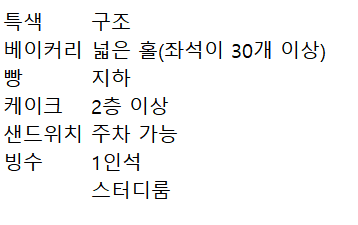

In [67]:
cafe_data

,cafe_name,overview,concept
0,데우스,"분위기도 좋고 커피, 케이크도 맛있어요 또 오고 싶어용 디저트 맛있어요 커피는 아쉬...",빵 넓은 홀
1,스타벅스 합정점,직원분들이 정말 친절하고 좋아요 커피와 음료가 맛있고 직원분들이 친절하십니다 합정역...,샌드위치 넓은 홀 주차
2,보몽드,카페가 엄청 넓고 인테리어가 독특해요! 야외 정원도 너무 예뻐요. 음료도 맛있네용 ...,케이크 넓은 홀 주차


## 세 텍스트 필드들을 모아서 텍스트 유사도에 사용할 텍스트 필드 하나를 생성

In [68]:
for f in ['cafe_name','overview','concept']: # 0, 1, 2 열
  cafe_data[f] = cafe_data[f].fillna('') # 결측값을 ''로 변경해준다.

In [69]:
def combine_features(row): # 특징들 결합. 그러니까 이름, overview, concept들의 특징을 합치고 나서 비교과정을 진행한다는 것이다.
    try:
        return row['cafe_name']+" "+row['overview']+" "+row["concept"] # 세 개의 필드(열)를 붙임
    except:
        print ("Error:", row) # 안될 시 Error 를 띄운다.

In [70]:
cafe_data["combined_features"] = cafe_data.apply(combine_features,axis=1) 
# combine_features 함수를 적용하고자 하는 함수로 넣어준다.
# 또한 axis=1을 통해 이 함수를 행으로 적용해준다.
cafe_data = cafe_data.reset_index() 
# 매우 중요한 부분. 기존의 행 인덱스를 제거하고 인덱스를 데이터 열로 추가한다.
# 인덱스를 보통의 자료열로 바꿔주는 것이다. 이 때 인덱스 열은 자료열의 가장 선두로 삽입된다.
# 유사도 계산을 위해 이렇게 해주는 것으로 보인다.

In [71]:
cafe_data["combined_features"] # 선두에 인덱스를 확인할 수 있다. 

0    데우스 분위기도 좋고 커피, 케이크도 맛있어요 또 오고 싶어용 디저트 맛있어요 커피...
1    스타벅스 합정점 직원분들이 정말 친절하고 좋아요 커피와 음료가 맛있고 직원분들이 친...
2    보몽드 카페가 엄청 넓고 인테리어가 독특해요! 야외 정원도 너무 예뻐요. 음료도 맛...
Name: combined_features, dtype: object

## TF-IDF 기반 벡터 생성 후 코사인 유사도로 카페들간의 유사도 계산

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer # Tf-idf vectorizer import
from sklearn.metrics.pairwise import cosine_similarity # cosine similarity import

In [73]:
tfidfvectorizer = TfidfVectorizer(analyzer='word', norm='l2') # 학습의 단위를 단어로 설정 + ㅣ2 정규화!

In [74]:
tfidf_matrix = tfidfvectorizer.fit_transform(cafe_data["combined_features"])
# fit -> 데이터를 학습시키는 메서드
# transform -> 학습시킨 것을 적용하는 메서드
# fit_transform을 사용하는 것과 fit을 하고 transform을 하는거는 아주 약간의 미세한 성능 차이는 있지만 더 효율적임.
# transform 까지 거쳐 행렬이 생성됨. 

In [75]:
tfidf_matrix.shape

(3, 87)

In [76]:
cosine_sim = cosine_similarity(tfidf_matrix) # 생성된 행렬의 코사인 유사도를 계산함.
cosine_sim # array

array([[1.        , 0.06240017, 0.10099606],
       [0.06240017, 1.        , 0.09106053],
       [0.10099606, 0.09106053, 1.        ]])

In [77]:
df_cosine_sim = pd.DataFrame(data = cosine_sim) # array -> 데이터프레임
df_cosine_sim.head(10)

,0,1,2
0,1.000000,0.062400,0.100996
1,0.062400,1.000000,0.091061
2,0.100996,0.091061,1.000000


## 아이템 기반 추천 함수 만들기

In [78]:
def get_name_from_index(df, index): # 인덱스로부터 카페이름을 얻을 수 있게하는 함수
    return df[df.index == index]["cafe_name"].values[0] # 인덱스가 파라미터로 입력되면, 그 인덱스에 해당하는 카페이름 추출

def get_index_from_name(df, name): # 카페 이름으로 부터 인덱스를 얻을 수 있는 함수
    return df[df.cafe_name == name]["index"].values[0] # 카페 이름이 파라미터로 입력되면, 그 이름에 해당하는 인덱스 추출

In [79]:
cosine_sim[0] # 0번째 인덱스의 카페와 0~9번째 인덱스의 카페들 간의 유사도

array([1.        , 0.06240017, 0.10099606])

In [80]:
for cs in enumerate(cosine_sim[0]):
  print(cs) # (인덱스, 해당 인덱스의 카페와 0번 인덱스 카페와의 유사도)

(0, 1.0000000000000004)
(1, 0.06240016800450972)
(2, 0.10099606360613095)


In [81]:
def reco_top_similar_cafes(cafe_name, n=3):
  cafe_index = get_index_from_name(cafe_data, cafe_name) # 위에서 만든 get_index_from_name 함수를 따로 사용
  similar_cafes =  enumerate(cosine_sim[cafe_index]) # cafe_index에 해당하는 행의 데이터를 읽어옴 (인덱스, 유사도값)
  sorted_similar_cafes = sorted(similar_cafes, key=lambda x:x[1], reverse=True) # 유사도값을 내림차순으로 (x[1]만 쓰면 오름차순이지만, reverse=True 로 설정했기 때문에 내림차순이 됨)

  ret_cafes = []
  i = 0
  for element in sorted_similar_cafes: # 유사도 값이 내림차순으로 정렬된 리스트를 맨 위부터 하나씩 찾는다
    name = get_name_from_index(cafe_data, element[0]) 
    ret_cafes.append(name) # 카페 이름이 append됨.
    i=i+1
    if i >= n: 
      break # 요청된 숫자만큼 찾는다. 여기서는 3번.
  return ret_cafes # 카페 이름들이 append 된 채 리턴이 된다. 밑에 예시를 참고하자. 

In [82]:
print(reco_top_similar_cafes('데우스', 2))

['데우스', '보몽드']
